In [166]:
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [167]:
# Loading Data
customer_data= pd.read_csv('Churn_Modelling_1.csv')
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [168]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [169]:
customer_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,649.296800,38.986200,5.032700,76336.868184,1.567600,0.70550,0.515100,99863.064427,0.203700
std,2886.89568,7.193619e+04,104.610733,10.706347,2.958937,62579.647407,1.326124,0.45584,0.499797,57904.108746,0.402769
min,1.00000,1.556570e+07,-722.000000,18.000000,0.000000,-154100.300000,1.000000,0.00000,0.000000,-171364.180000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50825.857500,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97079.410000,1.000000,1.00000,1.000000,100088.080000,0.000000
75%,7500.25000,1.575323e+07,717.250000,44.000000,8.000000,127633.195000,2.000000,1.00000,1.000000,149369.790000,0.000000
max,10000.00000,1.581569e+07,850.000000,118.000000,29.000000,250898.090000,47.000000,1.00000,1.000000,199992.480000,1.000000


In [170]:
# Check Correlation
# CreditScore != -ve  ||  Age !> 90 || Tenure !> 10 (as bank is 10 yrs old) || Balance != -ve || EstimatedSalary != -ve

# Imputation

In [171]:
customer_data['CreditScore']= customer_data['CreditScore'].apply(lambda x: customer_data[customer_data['CreditScore']>0]['CreditScore'].mean() if x<0 else x) # if CreditScore<0 then replace it with mean of CreditScore
customer_data['Age']= customer_data['Age'].apply( lambda x: x if x<90 else 90) # if Age>90 then replace it with 90
customer_data['Tenure']= customer_data['Tenure'].apply( lambda x: x if x<=10 else 10) # if Tenure>10 then replace it with 10
customer_data['Balance']= customer_data['Balance'].apply(lambda x: x if x>=0 else -x) # if Balance<0 then replace it with -ve of -ve Balance
customer_data['EstimatedSalary']= customer_data['EstimatedSalary'].apply(lambda x: x if x>=0 else -x) # if EstimatedSalary<0 then replace it with -ve of -ve EstimatedSalary
customer_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.563363,38.967800,5.017800,76485.889288,1.567600,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.617269,10.601566,2.894844,62397.405202,1.326124,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,717.250000,44.000000,8.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,90.000000,10.000000,250898.090000,47.000000,1.00000,1.000000,199992.480000,1.000000


# EDA and Univariate Analysis

<Axes: >

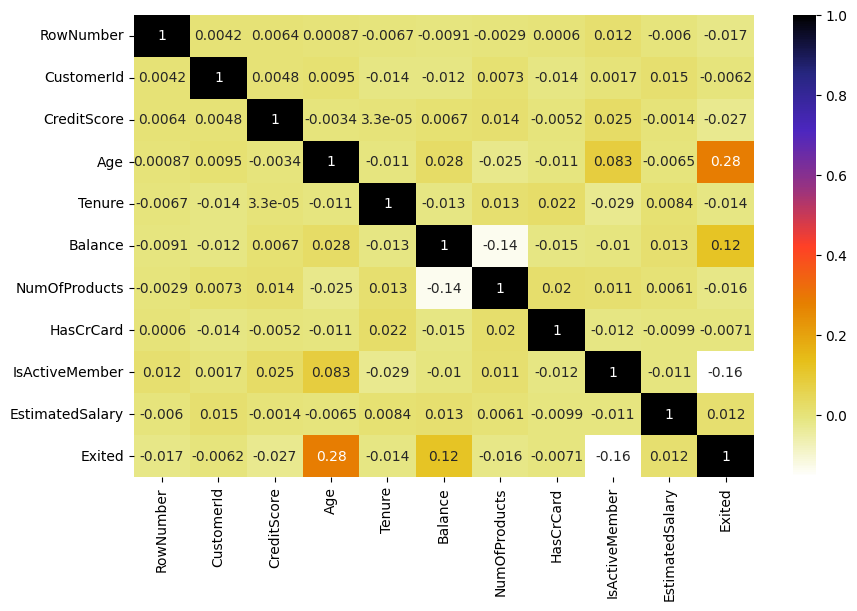

In [172]:

plt.figure(figsize=(10,6))
sns.heatmap(customer_data.select_dtypes(include=['number']).corr(), annot= True, cmap= plt.cm.CMRmap_r)   # ----> less correlation between features


<Axes: xlabel='Age', ylabel='Count'>

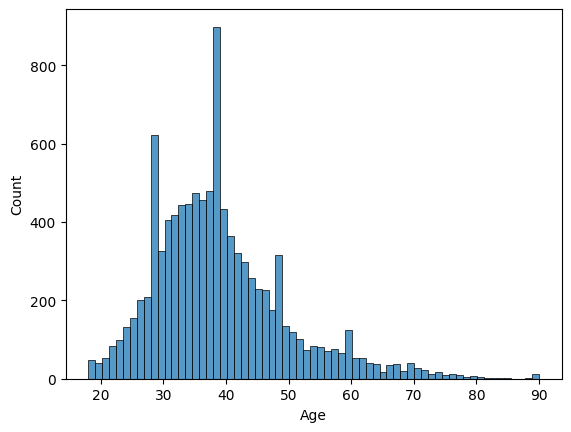

In [173]:

# sns.histplot(customer_data['CreditScore'])  # -----> Normal Distribution with some outliers
sns.histplot(customer_data['Age'])   # -----> Normal Distribution with some outliers

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>, <Axes: >]],
      dtype=object)

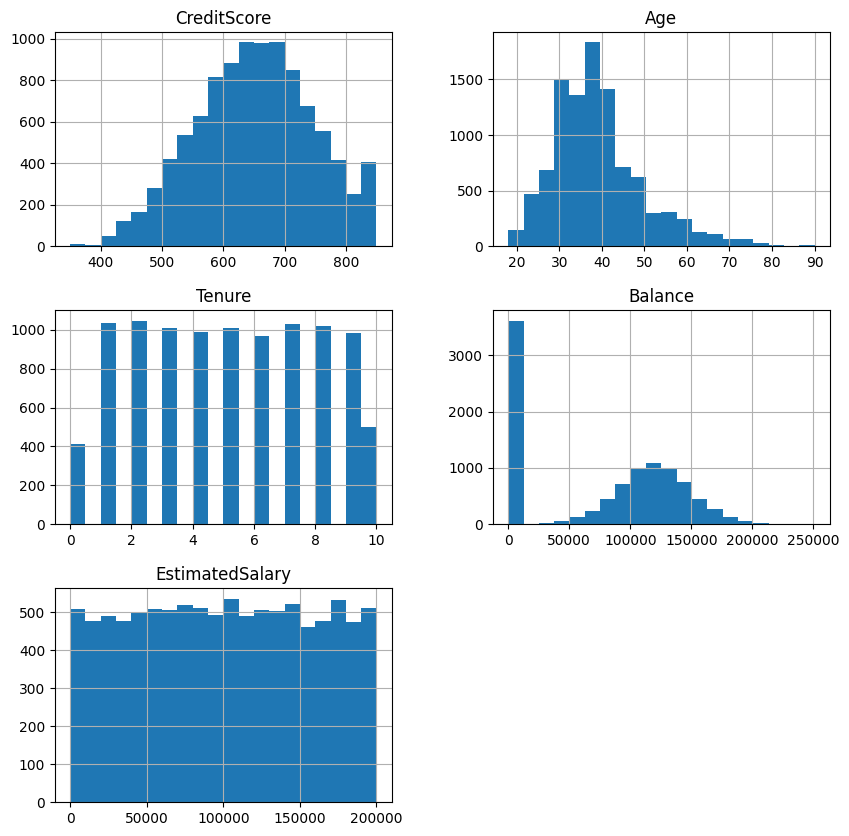

In [174]:
columns_to_include = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
customer_data.hist(column= columns_to_include, figsize= (10,10), bins= 20)


In [175]:
# Checking for duplicates
duplicate_rows= customer_data[customer_data.duplicated()]
print(duplicate_rows.shape)  # ----> No Duplicates

(0, 14)


# Feature Engineering


In [176]:
# remove unnecessary columns
dataset= customer_data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [177]:
# Converting categorical --> numeric column
dataset = dataset.drop(['Geography','Gender'], axis=1)
Geography= pd.get_dummies(customer_data.Geography,drop_first= True).astype(int)
Gender= pd.get_dummies(customer_data.Gender, drop_first= True).astype(int)

dataset= pd.concat([dataset,Geography,Gender], axis=1)
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619.0,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608.0,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502.0,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699.0,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850.0,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [178]:
# Creating independent and dpendent variables
X= dataset.drop('Exited', axis=1)
y= dataset['Exited']

In [179]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
 

# ML Modelling

In [187]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report
rf_classifier= RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train,y_train)
rf_prediction= rf_classifier.predict(X_test)

print(classification_report(y_test,rf_prediction))
print(accuracy_score(y_test,rf_prediction))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

0.8685


In [ ]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_model= XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_prediction= xgb_model.predict(X_test)

print(classification_report(y_test, xgb_prediction))
print(accuracy_score(y_test,xgb_prediction))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.52      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

0.8625


# Model Evaluation

<Figure size 1000x600 with 0 Axes>

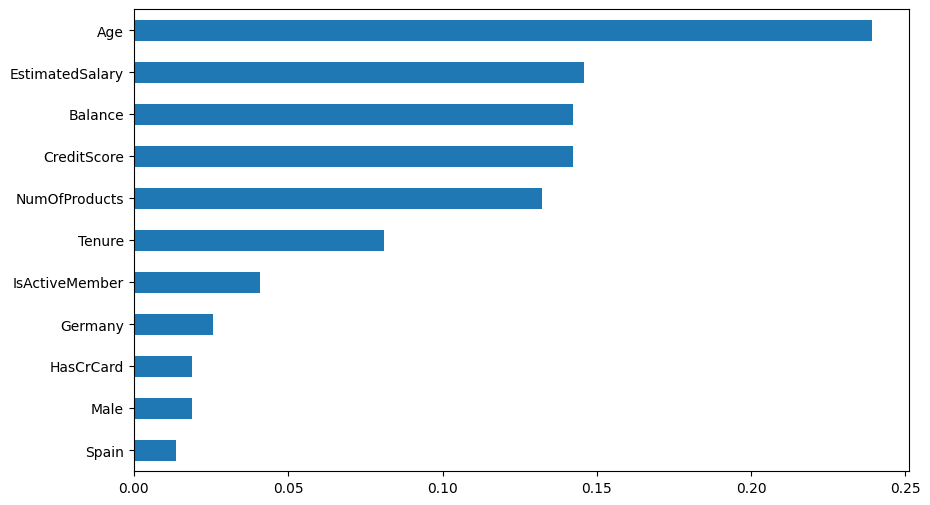

<Figure size 1000x600 with 0 Axes>

In [192]:
# we will go with XGBoost as it has better accuracy
feature_importance= pd.Series(rf_classifier.feature_importances_, index= X.columns).sort_values(ascending=True)
feature_importance.plot(kind='barh', figsize=(10,6))
plt.figure(figsize=(10,6))